In [51]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data_paths = tf.io.matching_files('../dataset/cifar/train/*.png')
#data_paths = glob('../dataset/cifar/train/*.png')

In [36]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\cifar\\train\\0_frog.png'>

## Load Image

In [37]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

## Set Data Generator

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

차원수를 늘려주기 위해 newaxis를 해줍니다.

In [39]:
inputs = image[tf.newaxis, ...]

ImageDataGenerator : 모델에 데이터를 넣으면서 데이터에 변환을 주면서 넣어주는 것입니다. 이미지 변화를 주면서 학습시켜주기 위해서 ImageDataGenerator를 쓰는 것입니다.

In [40]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

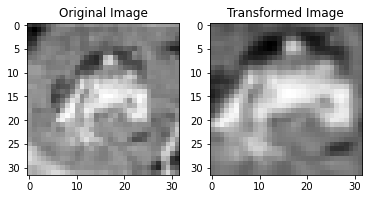

In [41]:
plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

In [42]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

2.3646724 252.23427 108.224144


## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

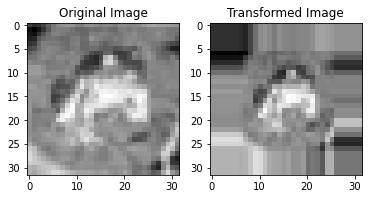

In [43]:
datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

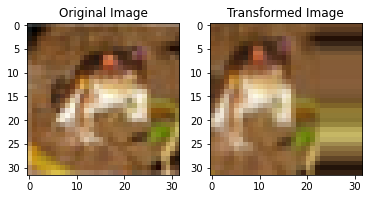

In [49]:
datagen = ImageDataGenerator(
    width_shift_range=0.3,
    zoom_range=0.3,
    rescale=1./255.
)

outputs=next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(np.squeeze(inputs))

plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(np.squeeze(outputs))
plt.show()

## Rescale시 주의사항

In [50]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

rescale은 해주되, augmentation은 해주지맙시다. test까지 꼬을 필요는 없습니다. test때 성능차이가 나기 때문이죠